In [3]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Getting Started


In [4]:
# Importing GemPy and viewer
import gempy as gp
import gempy_viewer as gpv

# Auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Setting Backend To: AvailableBackends.numpy


## Initializing the model:

Create a gempy.Model object. This object will contain all other data structures
and necessary functionality. We'll also define a regular grid for this example.
This grid will be used for interpolating the 3D geological model. GemPy offers
different grids for various purposes. For visualization, a regular grid is most
appropriate. 



In [5]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Model1',
    extent=[0, 791, -200, 200, -582, 0],
    resolution=[100,100,100],
    #refinement=4, # We will use octrees
    structural_frame=gp.data.StructuralFrame.initialize_default_structure()
)
geo_model

{'_interpolation_options': InterpolationOptions(kernel_options={'range': 1.7, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x000001B3989D8D60>, derivative_div_r=<function cubic_function_p_div_r at 0x000001B3989D8EA0>, second_derivative=<function cubic_function_a at 0x000001B3989D8F40>, consume_sq_distance=False)>, 'kernel_solver': <Solvers.DEFAULT: 1>, 'compute_condition_number': False, 'optimizing_condition_number': False, 'condition_number': None}, evaluation_options={'_number_octree_levels': 1, '_number_octree_levels_surface': 4, 'octree_curvature_threshold': -1, 'octree_error_threshold': 1.0, 'octree_min_level': 2, 'mesh_extraction': True, 'mesh_extraction_masking_options': <MeshExtractionMaskingOptions.INTERSECT: 3>, 'mesh_extraction_fancy': True, 'evaluation_chunk_size': 500000, 'compute_scalar_gradient': False, 'verbose': False}, temp_inter

## Creating a figure:

GemPy utilizes matplotlib for 2D and pyvista-vtk for 3D visualizations. 
One design goal of GemPy is real-time model construction. This means as input data
is added, you can see the 3D surfaces update in real-time. Let's initialize 
the visualization windows. First, the 2D figure:



C:\Users\ges\.conda\envs\gempy2024\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


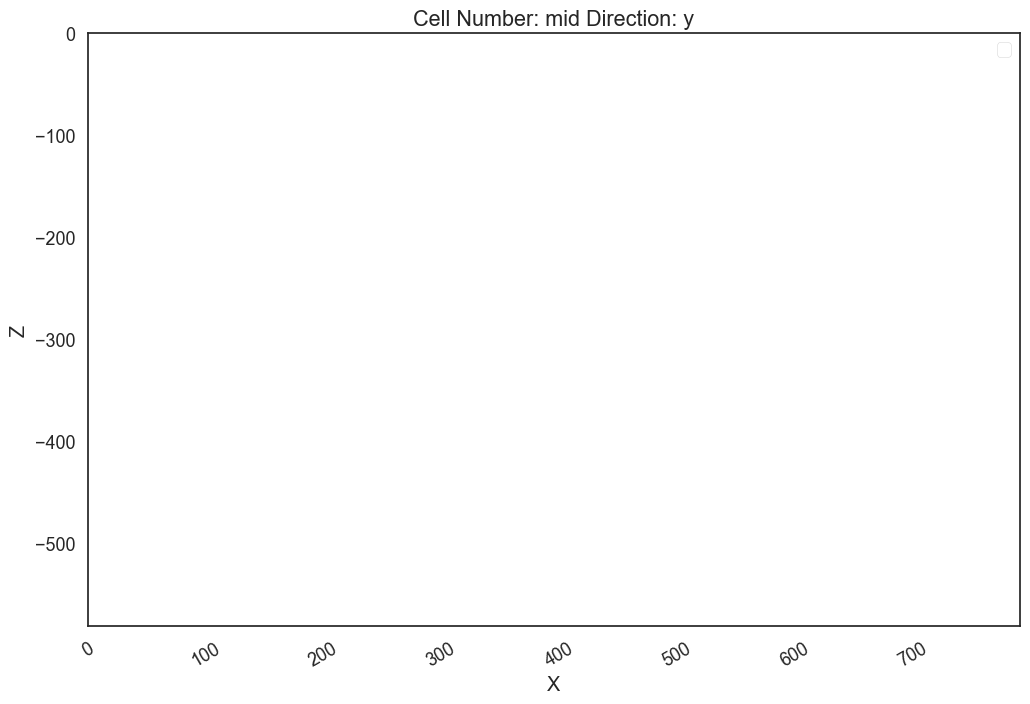

In [6]:
p2d = gpv.plot_2d(geo_model)

### Adding a model section:

In the 2D renderer, we can add several cross sections of the model. 
For simplicity, we'll add just one, perpendicular to y.



#### Loading a cross-section image:

GemPy uses standard matplotlib axes, allowing for flexibility. 
Let's load an image showing the details of a couple of boreholes:



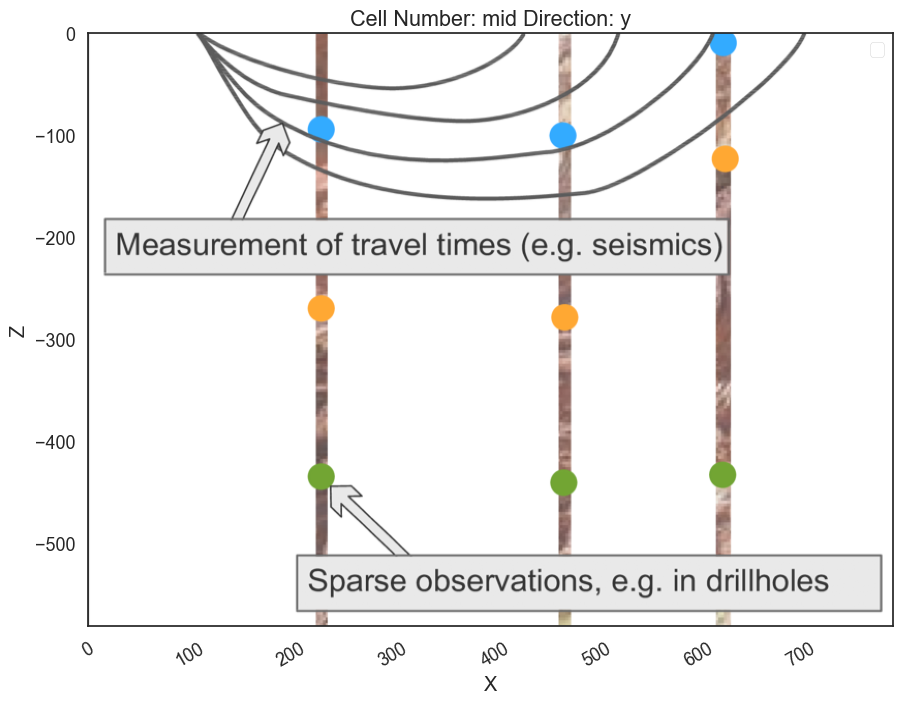

In [7]:
img = mpimg.imread('wells.png')
p2d = gpv.plot_2d(geo_model, show=False)
p2d.axes[0].imshow(img, origin='upper', alpha=.8, extent=(0, 791, -582, 0))
plt.show()

Similarly, we can visualize in 3D using pyvista and vtk:



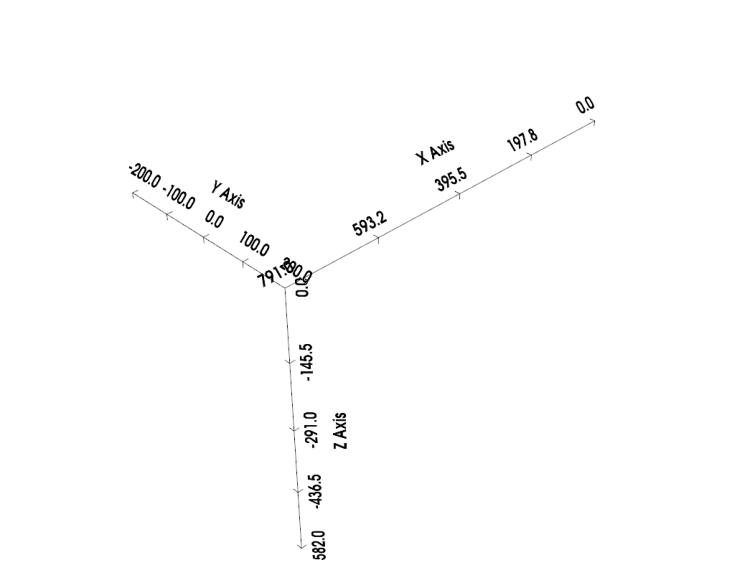

In [8]:
p3d = gpv.plot_3d(geo_model, image=True)

#### Building the model:

With everything initialized, we can begin constructing the geological model.

## Surfaces:

GemPy is a surface-based interpolator. All input data must be referred to a 
surface, which marks the bottom of a unit. By default, GemPy surfaces are empty:



In [9]:
geo_model.structural_frame.structural_elements

[Element(
 	name=surface1,
 	color=#015482,
 	is_active=True
 ),
 Element(
 	name=basement,
 	color=#9f0052,
 	is_active=True
 )]

Let's begin by adding data. GemPy input data consists of surface points and 
orientations (perpendicular to the layers). The 2D plot provides X and Z 
coordinates on mouse hover (in qt5 backend). We can add a surface point like this:



C:\Users\ges\.conda\envs\gempy2024\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


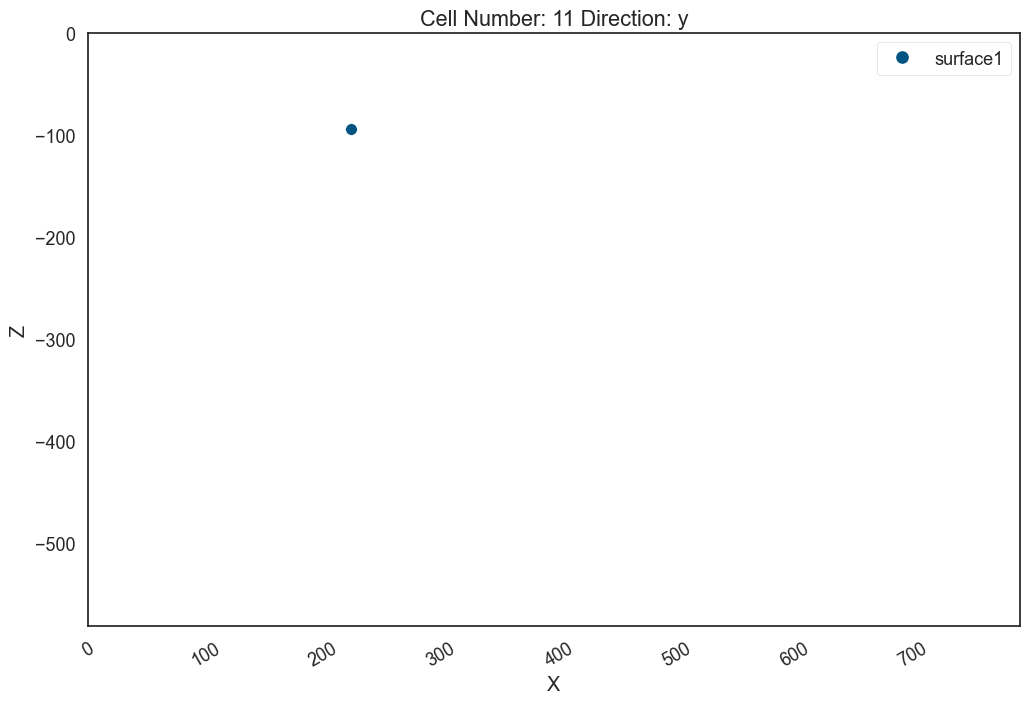

In [10]:
gp.add_surface_points(
    geo_model=geo_model,
    x=[223],
    y=[0.01],
    z=[-94],
    elements_names=['surface1']
)

gpv.plot_2d(geo_model, cell_number=11)
#gpv.plot_3d(geo_model, image=True)

We can now add other points for the layer:



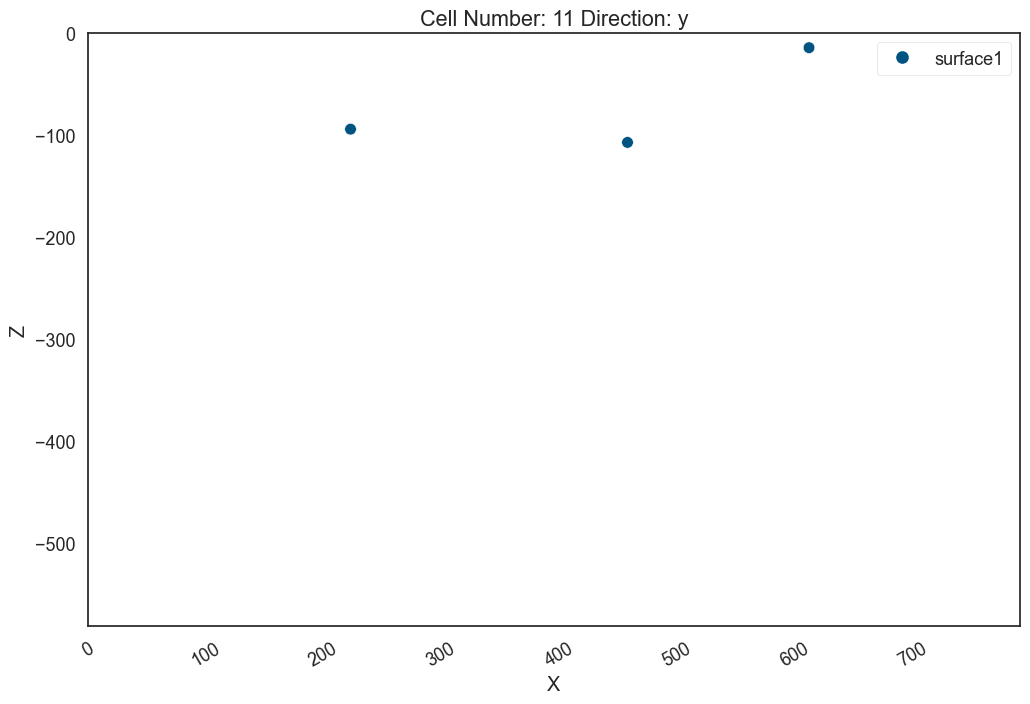

In [11]:
gp.add_surface_points(
    geo_model=geo_model,
    x=[458, 612],
    y=[0, 0],
    z=[-107, -14],
    elements_names=['surface1', 'surface1']
)

gpv.plot_2d(geo_model, cell_number=11)
#gpv.plot_3d(geo_model, image=True)

To interpolate in gempy, the minimum data needed is:

  a) 2 surface points per surface 

  b) One orientation per series

Let's add an orientation:



In [12]:
gp.add_orientations(
    geo_model=geo_model,
    x=[350],
    y=[1],
    z=[-300],
    elements_names=['surface1'],
    pole_vector=[[0, 0, 1.01]]
)



StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formations,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=surface1,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

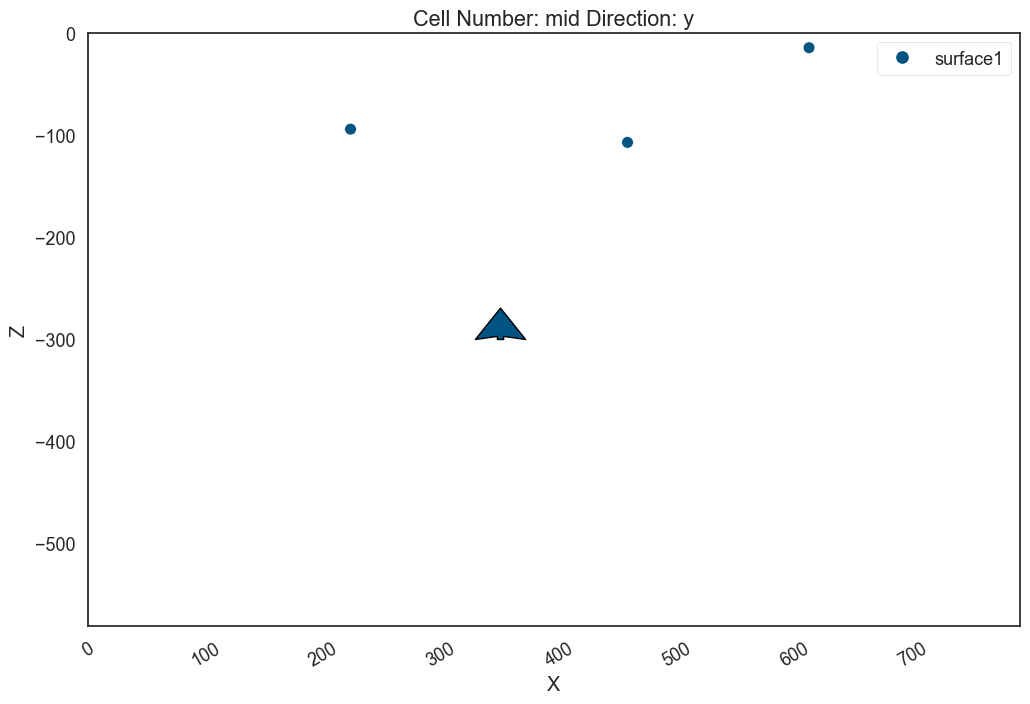

In [13]:
geo_model.update_transform(gp.data.GlobalAnisotropy.NONE)
gpv.plot_2d(geo_model)
#gpv.plot_3d(geo_model, image=True)

## Update and Recompute Model Transform:
Removing auto anisotropy for this 2.5D model.



In [14]:
geo_model.update_transform(gp.data.GlobalAnisotropy.NONE)

## Interpolation:
With the provided data, we can now interpolate the 3D surface.



In [15]:
#gp.compute_model(geo_model, engine_config=gp.data.GemPyEngineConfig())

Display interpolation kernel options:



In [16]:
#geo_model.interpolation_options.kernel_options

## Visualization:
Interpolated 3D surface can be visualized both in 2D and 3D.



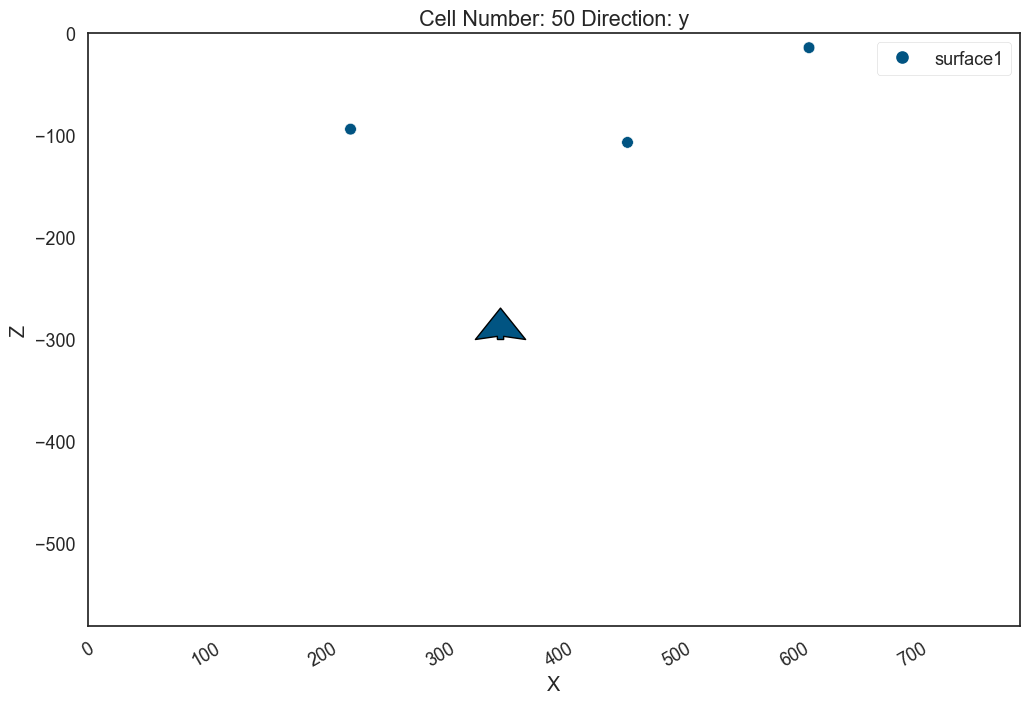

In [17]:
# 2D visualization:
gpv.plot_2d(geo_model, cell_number=[50],show_scalar=True)

# 3D visualization:
#gpv.plot_3d(geo_model, show_surfaces=True, image=True)

## Expanding the Model with More Layers:
Our cross-section image displays 4 layers, yet we only defined 2. Let's add two more.



In [18]:
# Display current structural frame:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formations,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=surface1,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

## Defining Layer 2:
Adding points and properties for the next layer.



In [19]:
element2 = gp.data.StructuralElement(
    name='surface2',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([225, 459]),
        y=np.array([0, 0]),
        z=np.array([-269, -279]),
        names='surface2'
    ),
    orientations=gp.data.OrientationsTable.initialize_empty()
)

geo_model.structural_frame.structural_groups[0].append_element(element2) 

C:\Users\ges\.conda\envs\gempy2024\Lib\site-packages\gempy\core\data\structural_frame.py:206: UserWarning: The basement color was already used in the structural elements.Changing the basement color to #ffbe00.
  warnings.warn(f"The basement color was already used in the structural elements."


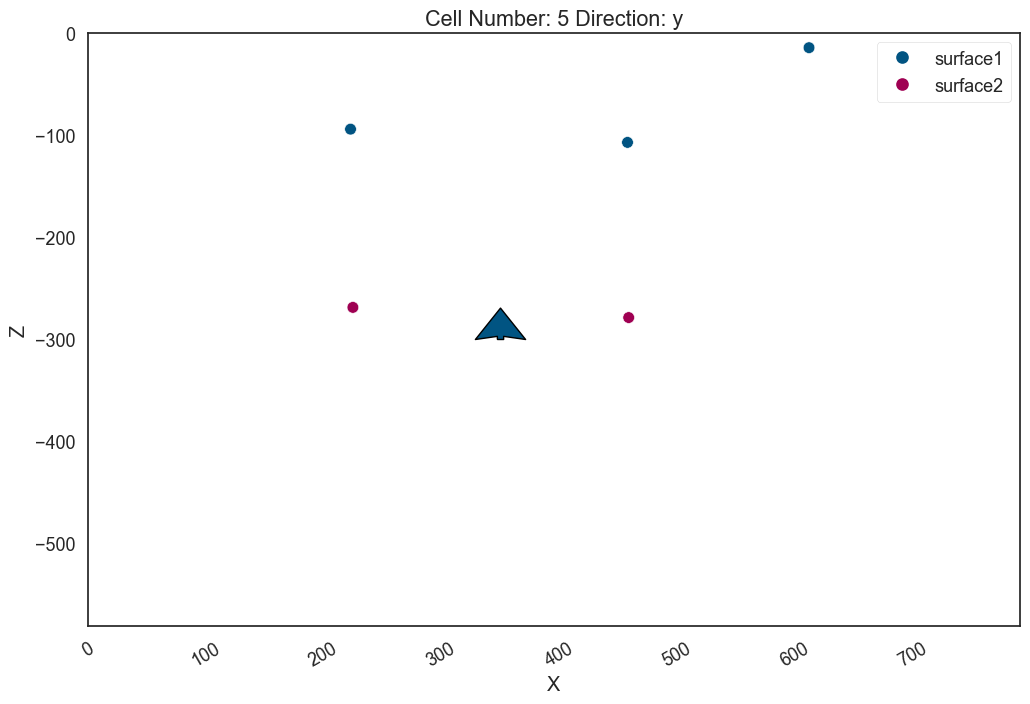

In [20]:

#geo_model.structural_frame.structural_elements
# Compute and visualize the updated model: 
#gp.compute_model(geo_model)
gpv.plot_2d(geo_model, cell_number=5,show_scalar=True)
#gpv.plot_3d(geo_model, show_data=False, show_surfaces=False, image=True)

## Defining Layer 3:
Adding points and properties for another layer.



In [21]:
element3 = gp.data.StructuralElement(
    name='surface3',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([225, 464, 619]),
        y=np.array([0, 0, 0]),
        z=np.array([-439, -456, -433]),
        names='surface3'
    ),
    orientations=gp.data.OrientationsTable.initialize_empty()
)

geo_model.structural_frame.structural_groups[0].append_element(element3)

In [22]:
# Compute and visualize with adjusted parameters: 
#gp.compute_model(geo_model)

#gpv.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2}, image=True)

C:\Users\ges\.conda\envs\gempy2024\Lib\site-packages\gempy\core\data\structural_frame.py:206: UserWarning: The basement color was already used in the structural elements.Changing the basement color to #728f02.
  warnings.warn(f"The basement color was already used in the structural elements."


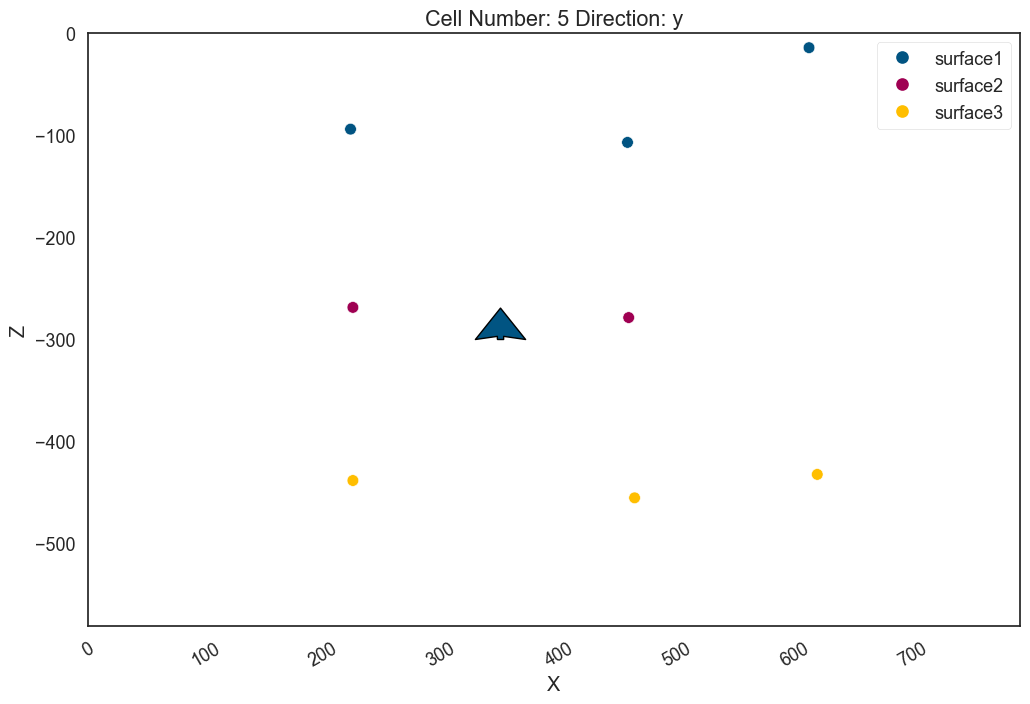

In [23]:
gpv.plot_2d(geo_model, cell_number=5, legend='force')

## Adding a Fault:
To date, our model represents a simple depositional unit. With GemPy, we can
incorporate unconformities and faults for more intricate models. 
Relationships are depicted as:
input data (surface points/ orientations) <belong to< surface <belong to< series.
Here, we'll add a fault as a demonstration. 



Add the fault's input data:



C:\Users\ges\.conda\envs\gempy2024\Lib\site-packages\gempy\core\data\structural_frame.py:206: UserWarning: The basement color was already used in the structural elements.Changing the basement color to #443988.
  warnings.warn(f"The basement color was already used in the structural elements."


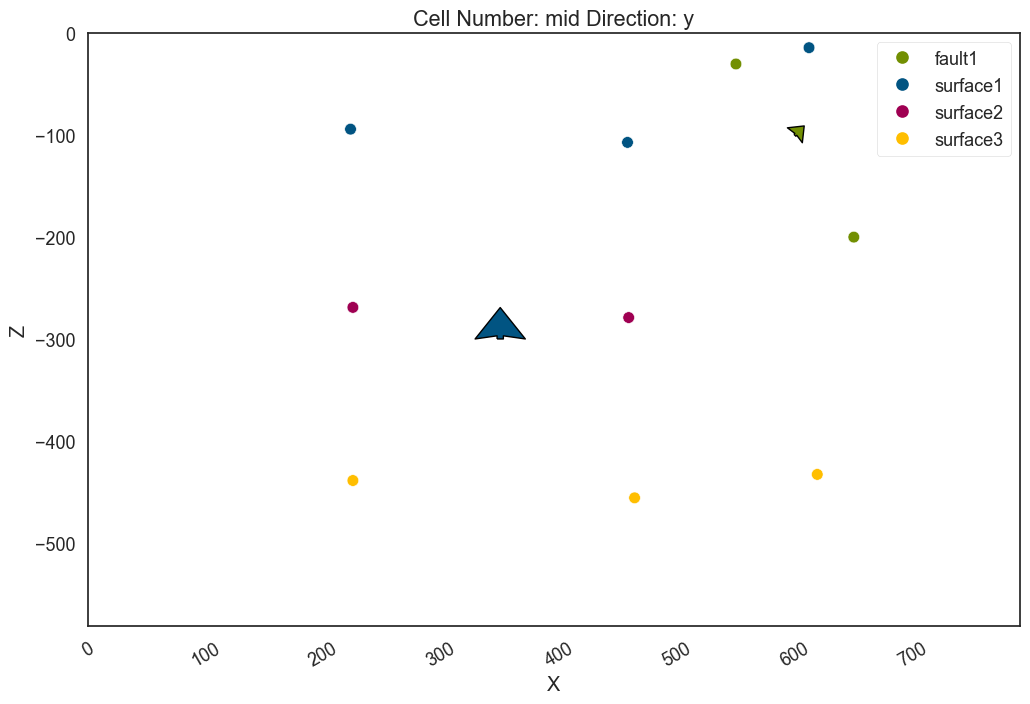

In [24]:
element_fault = gp.data.StructuralElement(
    name='fault1',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([550, 650]),
        y=np.array([0, 0]),
        z=np.array([-30, -200]),
        names='fault1'
    ),
    orientations=gp.data.OrientationsTable.from_arrays(
        x=np.array([600]),
        y=np.array([0]),
        z=np.array([-100]),
        G_x=np.array([.3]),
        G_y=np.array([0]),
        G_z=np.array([.3]),
        names='fault1'
    )
)

group_fault = gp.data.StructuralGroup(
    name='Fault1',
    elements=[element_fault],
    structural_relation=gp.data.StackRelationType.FAULT,
    fault_relations=gp.data.FaultsRelationSpecialCase.OFFSET_ALL
)

# Insert the fault group into the structural frame:
geo_model.structural_frame.insert_group(0, group_fault)

# Preview the model's input data:
gpv.plot_2d(geo_model, show_results=False)

Compute and visualize the updated model:



In [25]:
gp.set_is_fault(geo_model,['Fault1'])
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Fault1,
	structural_relation=StackRelationType.FAULT,
	elements=[
Element(
	name=fault1,
	color=#527682,
	is_active=True
)
]
),
StructuralGroup(
	name=default_formations,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=surface1,
	color=#015482,
	is_active=True
),
Element(
	name=surface2,
	color=#9f0052,
	is_active=True
),
Element(
	name=surface3,
	color=#ffbe00,
	is_active=True
)
]
)
],
	fault_relations=
[[False,  True],
 [False, False]],

In [26]:
gp.compute_model(geo_model)


Setting Backend To: AvailableBackends.numpy
Chunking done: 15 chunks
Chunking done: 25 chunks


Solutions(4 Octree Levels, 4 DualContouringMeshes)

C:\Users\ges\.conda\envs\gempy2024\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


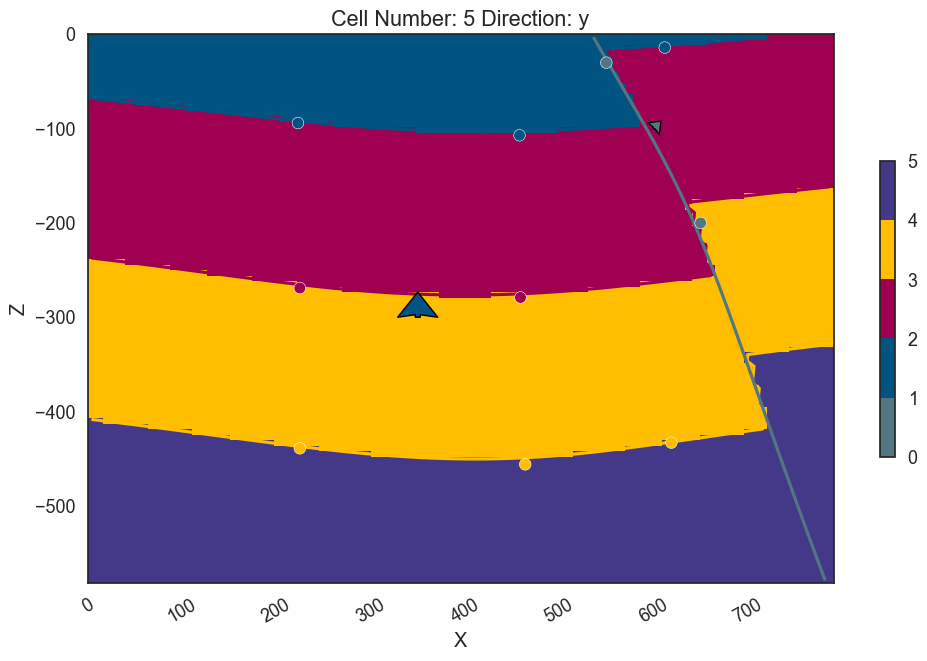

In [27]:
gpv.plot_2d(geo_model, cell_number=5, legend=None)
#gpv.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

## Advanced Features:
Over time, numerous capabilities have been integrated with GemPy. 
Here, we'll showcase a few of them.



Assign density values to model units:
geo_model.add_surface_values([0, 2.6, 2.4, 3.2, 3.6], ['density'])

Generate a centered grid around a device for improved accuracy:
geo_model.set_centered_grid(centers=[[400, 0, 0]], resolution=[10, 10, 100], radius=800)

Adjust the compile code for gravity computation:
gp.set_interpolator(geo_model, output=['gravity'], aesara_optimizer='fast_run')

Besides the interpolation, compute the model's forward gravity:
gp.compute_model(geo_model)
geo_model.solutions.fw_gravity

sphinx_gallery_thumbnail_number = -2



In [ ]:
gpv.plot_2d(geo_model, direction='y', cell_number=70,show=False)
#plt.scatter(xy_ravel[:, 0], xy_ravel[:, 1], s=1)
plt.show()

In [29]:
array_sol = geo_model.solutions.raw_arrays.lith_block.reshape((100,100,100), order='F')

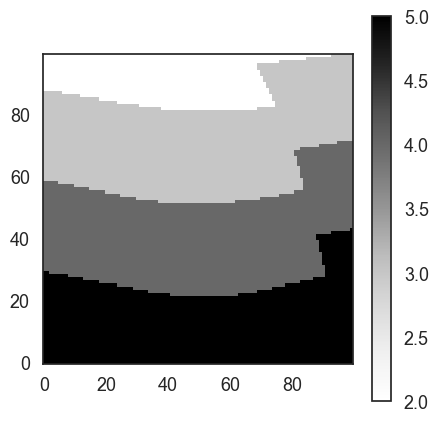

In [37]:
fig = plt.figure(figsize=(5,5))
plt.imshow(array_sol[:,70,:],origin='lower')
plt.colorbar()

In [41]:
#!pip install scikit-learn scikit-image
#from skimage.transform import rescale, resize, downscale_local_mean

array_sol2 = array_sol.copy()/1.

array_sol2[array_sol2==2]=1000
array_sol2[array_sol2==3]=1850
array_sol2[array_sol2==4]=2800
array_sol2[array_sol2==5]=4100

vmodel = array_sol2[:,70,:].copy()
vmodel = np.flip(vmodel,axis=0)

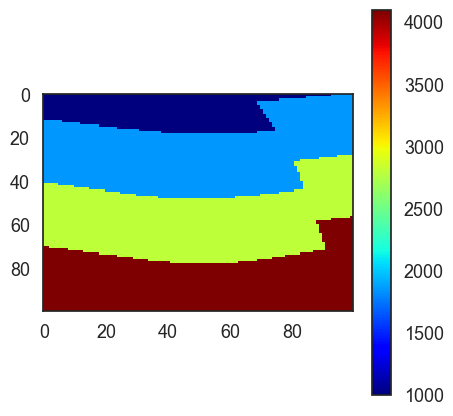

In [45]:
plt.figure(figsize=(5,5))
plt.imshow(vmodel,aspect=0.7,interpolation='nearest',cmap='jet')
plt.colorbar()

In [46]:
nx = 100
nz = 100

fx = 0
fz = -200

dx = np.abs(791)//nx
dz = np.abs(400)//nz

x_pos = np.arange(nx)*dx + fx
z_pos = -np.arange(nz)*dz +  fz

print('nx: ', nx)
print('nz: ', nz)
print('dx: ', dx)
print('dz: ', dz)

nx:  100
nz:  100
dx:  7
dz:  4


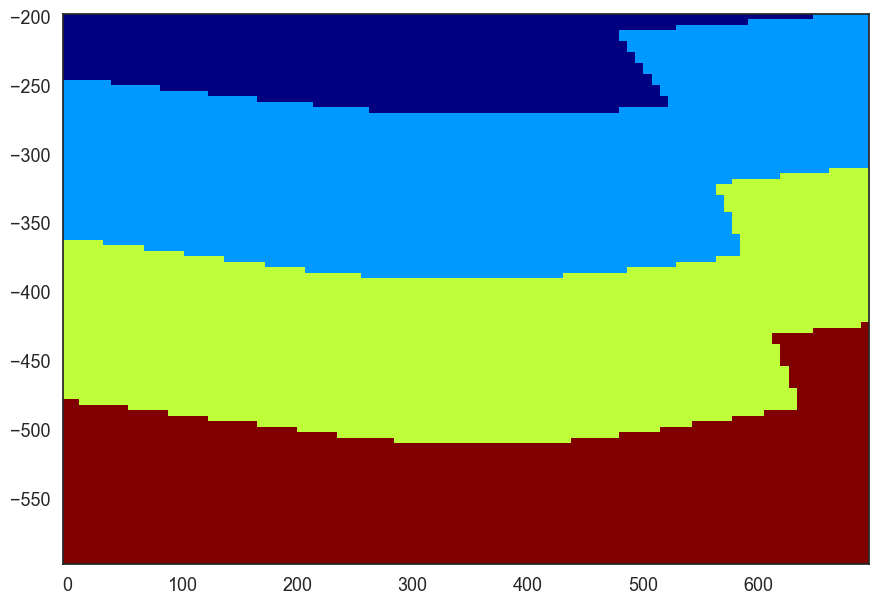

In [47]:
plt.pcolormesh(x_pos,z_pos, vmodel,cmap='jet')
#plt.colorbar()
#z_pos

In [48]:
np.save('vmodel_gempy.npy',vmodel)